In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [24]:
df = pd.read_csv('train.csv')

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Выполним предварительную обработку данных ###

a. **Обработка отсутствующих значений** <br>
Сначала определим, где есть отсутствующие значения

In [27]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index

Теперь создадим список столбцов для удаления

In [28]:
columns_to_drop = []
# проходим по каждому столбцу с отсутствующими значениями
for column in missing_columns:
    # проверяем, является ли столбец числовым
    if pd.api.types.is_numeric_dtype(df[column]):
        # если отсутствующих значений больше 750, добавляем столбец в список для удаления
        if missing_values[column] > 750:
            columns_to_drop.append(column)
        # если отсутствующих значений меньше или равно 750, заполняем средним значением
        else:
            df[column] = df[column].fillna(df[column].mean())
    else:
        # если столбец не числовой, добавляем его в список для удаления
        columns_to_drop.append(column)

Удаляем столбцы из списка

In [29]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

b. **Удаление дублирующихся строк**

In [31]:
df = df.drop_duplicates()

### Проведем разведочный анализ данных (EDA) ###

a. **Распределение целевой переменной 'SalePrice'**

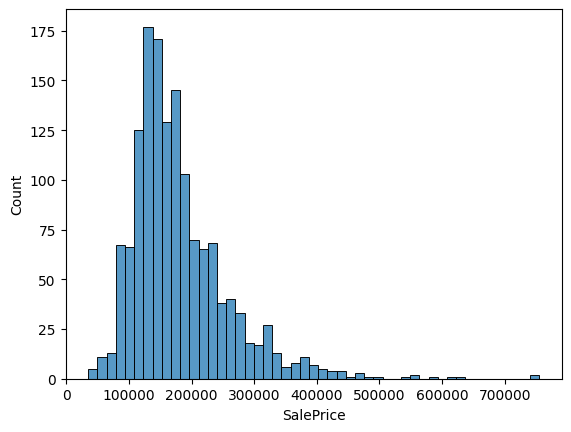

In [32]:
sns.histplot(df['SalePrice'], kde=False)
plt.show()

Проверка на выбросы

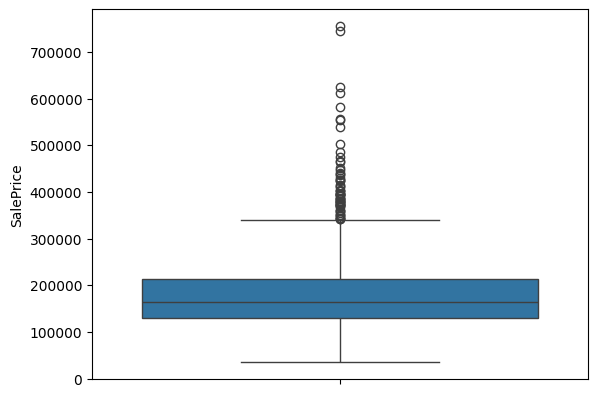

In [33]:
sns.boxplot(df['SalePrice'])
plt.show()

b. **Взаимосвязь между целевой переменной и другими характеристиками**

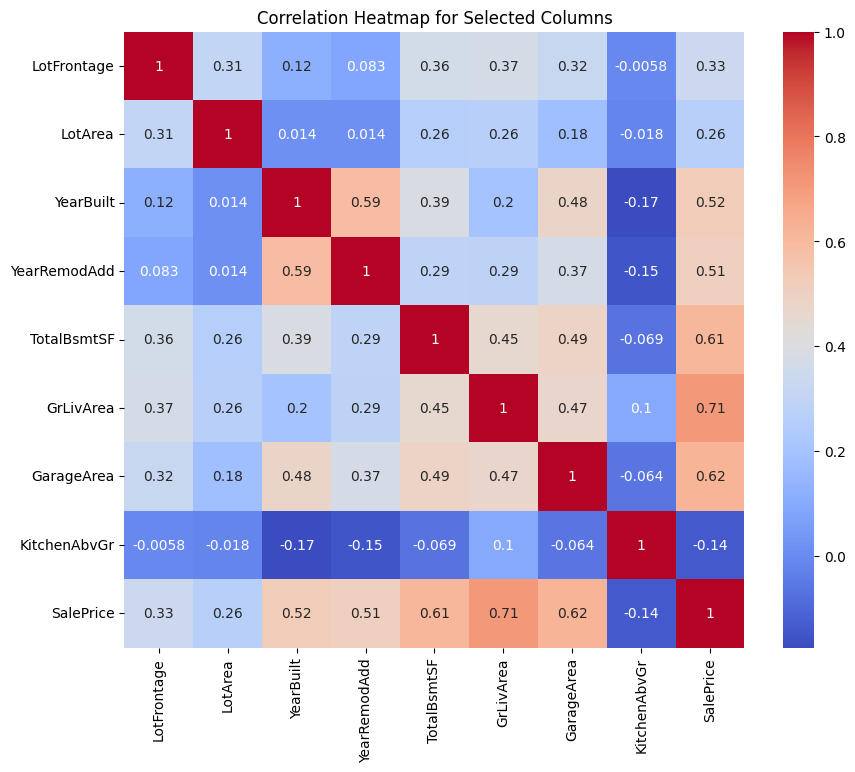

In [34]:
# Выбираем только столбцы, которые сильно вляют на цену
columns_to_analyze = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'KitchenAbvGr', 'SalePrice']
df_selected = df[columns_to_analyze]

# Вычисление корреляционной матрицы для выбранных столбцов
corr_selected = df_selected.corr()

# Построение heatmap для выбранных столбцов
plt.figure(figsize=(10, 8))
sns.heatmap(corr_selected, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

c. **Исследование распределения и взаимосвязей других важных характеристик**

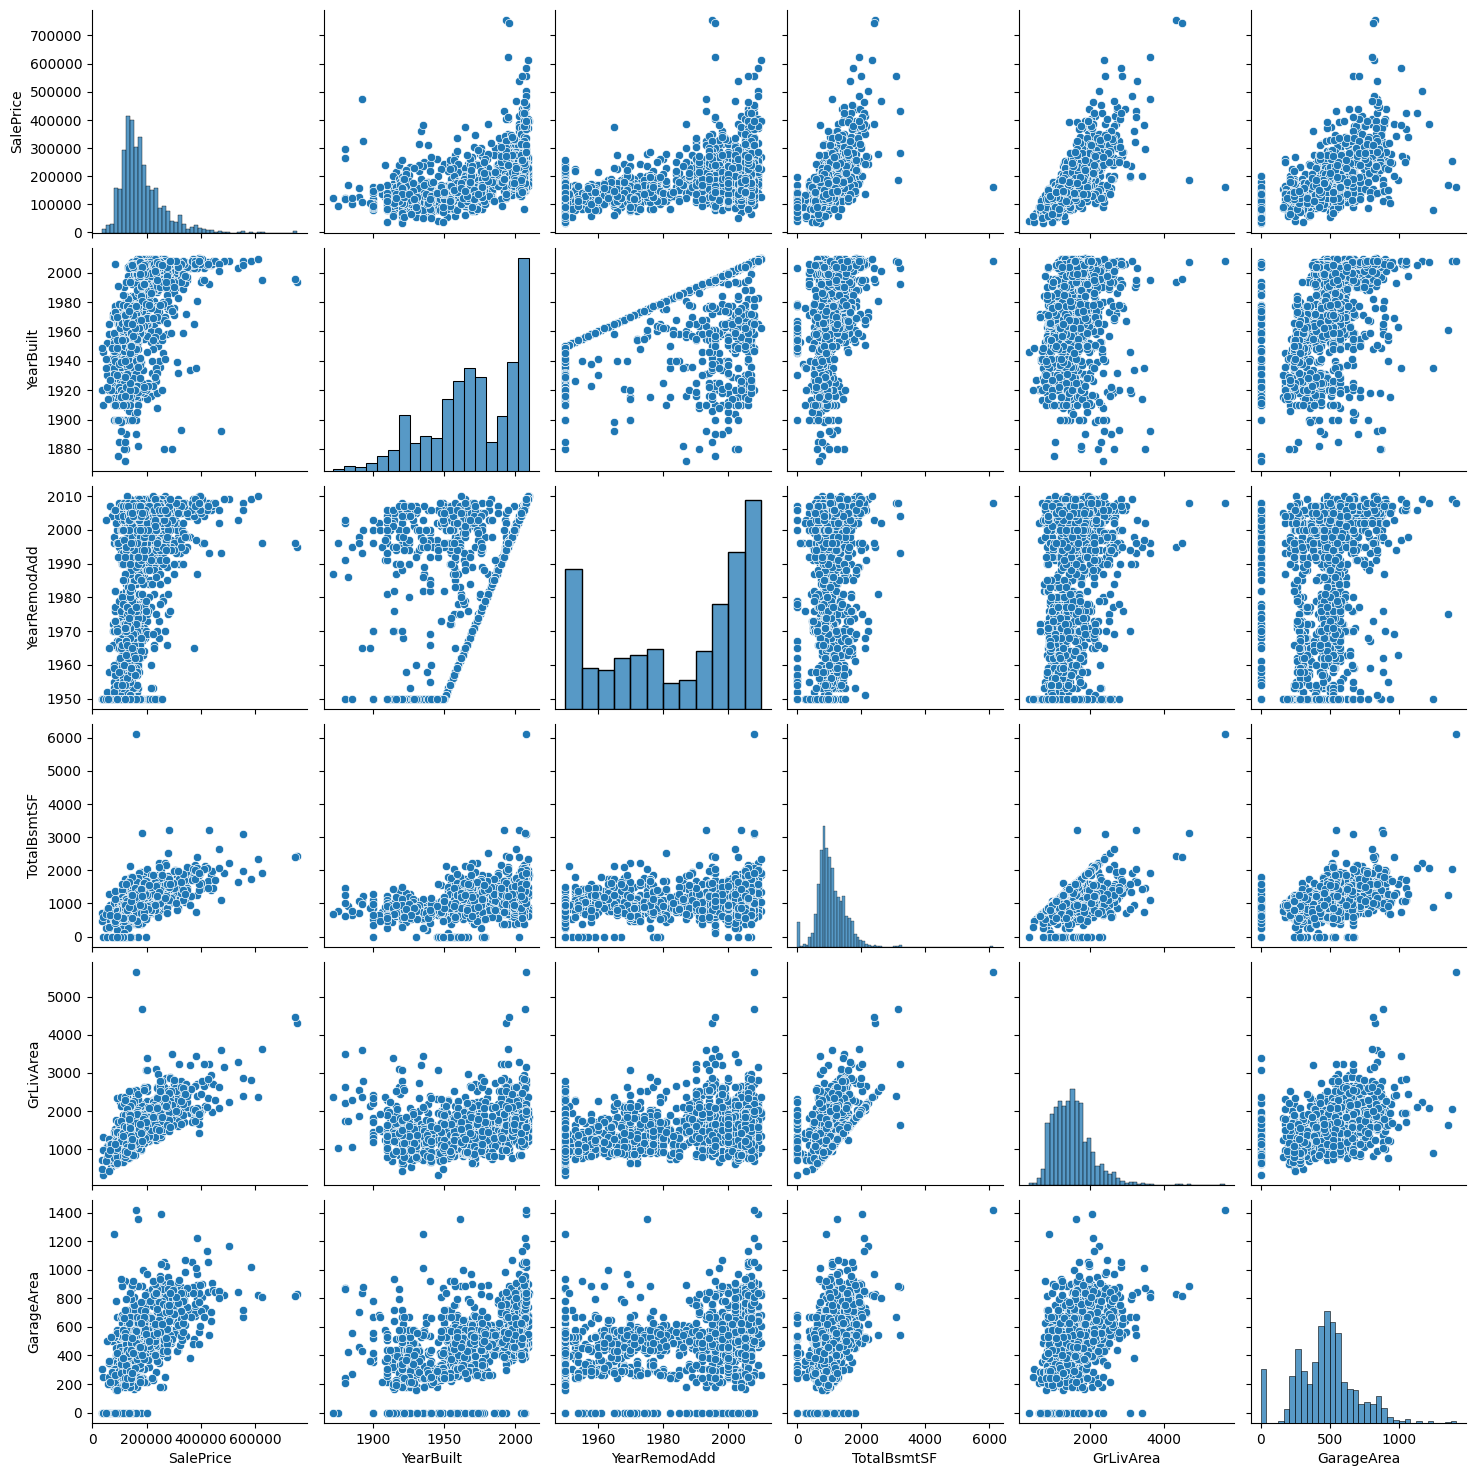

In [35]:
sns.pairplot(df[['SalePrice', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']])
plt.show()

d. **Визуализация данных**

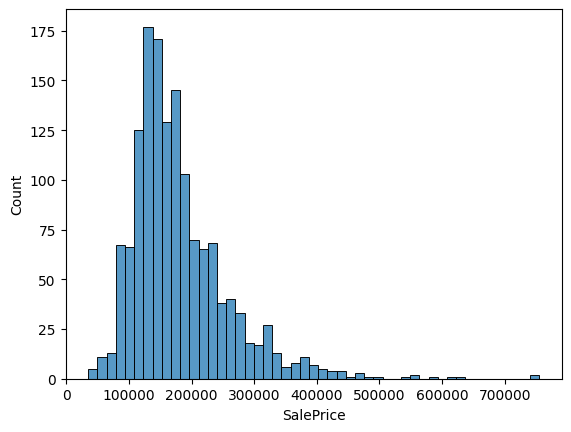

In [36]:
sns.histplot(df['SalePrice'])
plt.show()

In [37]:
df.to_csv('cleaned_house_prices.csv', index=False)

### Выполним проектирование признаков путем реализации следующих преобразований:

In [38]:
# Определение категориальных и числовых столбцов
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [39]:
print(categorical_columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


a. **Применим one-hot encoding и label encoding**

In [40]:
# Применение Label Encoding к категориальной переменной 'SaleCondition'
le = LabelEncoder()
df['SaleCond_Encoded'] = le.fit_transform(df['SaleCondition'])

In [41]:
# Применение One-Hot Encoding к переменной 'RoofStyle'
df = pd.get_dummies(df, columns=['RoofStyle'], prefix='Roof', drop_first=True)

b. **Создадим новый признак Дата продажи ("DateSold") путем объединения существующих "MoSold" и "YrSold"**

In [42]:
def format_date_sold(month, year):
    return f"{month:02d}.{year}"
    
df['DateSold'] = df.apply(lambda row: format_date_sold(row['MoSold'], row['YrSold']), axis=1)

In [43]:
# Посмотрим на результат
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleCond_Encoded,Roof_Gable,Roof_Gambrel,Roof_Hip,Roof_Mansard,Roof_Shed,DateSold
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2003.0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4,True,False,False,False,False,02.2008
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1976.0,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4,True,False,False,False,False,05.2007
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2001.0,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,4,True,False,False,False,False,09.2008
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,1998.0,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,True,False,False,False,False,02.2006
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,2000.0,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,4,True,False,False,False,False,12.2008


### Сохранение очищенного и преобразованного датасета в CSV-файл под названием 'cleaned_house_prices.csv'

In [44]:
df.to_csv('cleaned_house_prices.csv', index=False)